# Missing Values Treatment in Data Science

In an application-orientated field like data science, available datasets are almost always incomplete. Whether you like it or not, missing values treatment will become part of your analysis. 

Even in the situation where a data scientist quickly drops incomplete records from a dataset, a missing values treatment has (unconsciously) been chosen. Was it the most appropriate method, though? Or would the analysis outcome become different when a different missing data method was applied? 

In this blogpost, we present an interactive plot that can be used to explore the effect of missing data methods on several evaluation error metrics of a data science regression model.  

## Missing data exploration

Consider dataset 'Concrete Slump Test' from https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/. The data consists of 7 numerical features predicting the slump of concrete in centimeters. Because the original dataset does not contain missing values, we generated the missing values with our custom function `delete_data()` (all our functions and simulation code can be found on https://github.com/RianneSchouten/missing_data_science).

Let's quickly explore the incomplete Concrete Slump Test dataset. 

In [26]:
import pandas as pd
data_slump = pd.read_table('Simulations/Data/slump_test_incomplete.txt', sep='\t')
data_slump.shape

(103, 8)

In [27]:
data_slump.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,103.000000
mean,234.155128,77.011538,144.641026,196.002564,8.575641,878.641026,745.105128,18.048544
std,79.702410,59.758251,87.252087,19.885249,2.862121,84.127386,65.604795,8.750844
min,137.000000,0.000000,0.000000,160.000000,4.600000,708.000000,640.600000,0.000000
25%,153.250000,0.000000,115.250000,179.225000,6.000000,819.500000,686.500000,14.500000
50%,250.150000,98.000000,164.000000,193.950000,7.850000,876.500000,753.000000,21.500000
75%,308.750000,125.500000,227.000000,209.000000,10.000000,948.425000,789.150000,24.000000
max,374.000000,180.000000,250.000000,240.000000,19.000000,1049.500000,902.000000,29.000000


In [28]:
data_slump.isnull().any()

Cement           True
Slag             True
Fly ash          True
Water            True
SP               True
Coarse Aggr.     True
Fine Aggr.       True
SLUMP(cm)       False
dtype: bool

In [29]:
data_slump.isnull().sum()

Cement          25
Slag            25
Fly ash         25
Water           25
SP              25
Coarse Aggr.    25
Fine Aggr.      25
SLUMP(cm)        0
dtype: int64

In [30]:
data_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0
3,162.0,NaN,190.0,179.0,19.0,838.0,741.0,3.0
4,NaN,112.0,NaN,NaN,10.0,923.0,658.0,20.0


An easy way to get deal with missing values is by deleting all incomplete rows (or columns). Apart from the fact that this method can result in severely biased outcomes, dropping incomplete rows from the dataset would also make you lose a lot of valuable observed information. 

For example, for our `data_slump`, we would lose half of our dataset. 

In [31]:
data_slump.dropna().shape

(61, 8)

## Missing data mechanisms

In missing data theory, we classify missing data problems into three categories: MCAR, MAR and MNAR missingness. For any dataset with missing values in a certain feature X, the missing data is: 

- Missing Completely At Random (MCAR) when all values have an equal probability of being missing. 

- Missing At Random (MAR) when the probability of being missing depends on the values of another feature or on the values of the outcome variable. For instance, records with high values for outcome variable 'SLUMP' have a higher probability of being missing on feature 'Cement' or 'Water' (for example since it is harder to measure the percentage of cement or water in those situations).

- Missing Not At Random (MNAR) when the probability of being missing in feature X depends on the unobserved (missing) data. This can either be because suitable covariates for explaining missingness have not been recorded (or are otherwise unavailable) or the probability of being missing depends on the missing values itself. Extending the previous example, if the probability of measuring 'Cement' varied according to 'Cement' itself, this is missing not at random. 

Below, Figures 1, 2 and 3 show the effect of MCAR, MAR and MNAR missingness on the multivariate relationship between a feature X and an outcome variable Y. 

In [32]:
## add figures: Figures/MCAR.pdf, Figures/MAR.pdf, Figures/MNAR.pdf

Based on the observed data alone, we cannot distinguish between MAR and MNAR data. However, there are tests available to distinguish MCAR from the other two. The easiest and most commonly used test is Little's MCAR test; a chi-square test that is available in `R`-packages `BaylorEdPsych` or `MissMech`. Rianne is currently working on developing comparable functions in Python (https://github.com/RianneSchouten/pymice).

## Missing data methods

There is an extensive amount of missing data methods available in several software packages. In Python, it is easy to implement a method such as `dropna()` or to use the `mean` or `median` imputation functions from sklearn's `Imputer` class. 

However, how do you know which missing data method is most appropriate? What are the differences between all these methods?  

In our simulation, we implemented the following six missing values treatments. 

- Listwise deletion: Drop incomplete rows from the dataset
- Mean imputation: imputation with the column (i.e. feature) mean
- Median imputation: imputation with the column (i.e. feature) median
- Random imputation: imputation with a randomly chosen observed value (per column)
- Regression imputation: each column (i.e. feature) is regressed on the other features. We predict each incomplete value by using the observed values of the other features. When a predictive value is unobserved, we use mean imputation first
- Stochastic regression imputation: to account for the uncertainty of the regression model, we add (or subtract) a random amount from the prediction as obtained with regression imputation

## Simulation setup

The setup of our simulation is as follows: 

- For a given dataset, we generate missing values with our function `delete_data` (in file 'simulation.ipynb'). We assign missing values to all X features, but the output variable remains complete. For different simulation rounds, we create a MCAR, MAR or MNAR missingness mechanism. In case of MAR missingness, we base the missingess in the X features on the output variable.
- We also vary the missingness percentages. We have chosen to generate missing values with 5%, 10%, 15%, up to 55%.
- In each simulation, the incomplete dataset is split into 60% trainingset and 40% testset. We apply six kinds of missing values treatment: `dropna()`, `mean` and `median` imputation with `.Imputer`, and `random`, `regression` and `stochastic` regression imputation with three custom functions (available in file 'simulation.ipynb'). 
- We use a simple analysis model: `LinearRegression()` from `sklearn.linear_model` and evaluate with `sklearn.metrics`: `mean_squared_error`, sqrt(`mean_squared_error`), `mean_absolute_error` and `explained_variance`. 
- Every combination of missingness mechanism, missingness proportion and missing values treatment is repeated 500 times for the real datasets and 50 times for the simulated datastes. We report the average and IQR of the evaluation metrics. 

For now, we used two real datasets and four simulated datasets. Import and generation of these datasets can be found in files 'import_real_data.ipynb' and 'generate_data.ipynb' on https://github.com/RianneSchouten/missing_data_science. All simulation code is in file 'simulation.ipynb'.

## Simulation results

Explore the outcome of the simulations in our interactive plot. Select the dataset, missingness mechanism, evaluation metric, missing data method, whether you want to see the inter quartile range (IQR) and whether you want to see the percentage of missing rows or the percentage of missing cells.

A discussion of some of the output is given below the figure. 

In [33]:
# add interactive plot

### Concrete Slump Test

The Concrete Slump Test data has 7 numerical features that are used to predict the slump in cubic centimeters. In file 'evaluation_complete_data.ipynb', we calculated the error metrics for the original, complete dataset. These values could serve as a baseline or reference for the outcome of the simulations. The error metrics are as follows:

- MSE: 62.5
- RMSE: 7.8
- MAE: 6.5
- EV: 0.15

Let's start with exploring the error metrics for MCAR data. It turns out that on average, after imputing the missing values, the MSE, RMSE and MAE values decrease and the EV values increase. See for instance the MSE plot. 

In [34]:
# MSE plot Slump test MCAR data with rows

It seems that with a MCAR mechanism, the imputation methods perform equal for low missingness percentages. When the proportion of missing rows increases, `mean` and `median` imputation give lower MSE values than the other missing data methodologies. `regression` and `stochastic` regression imputation perform quite equal, but worse than `mean` and `median` imputation. `random` imputation seems to be the worst method, resulting in large MSE, RMSE and MAE values and explained variancs below 30%.

For this particular dataset, a MCAR mechanism would give the best evaluation metrics when the `drop.na()` method is used. Interestingly, if the missingness mechanism is MAR, `drop.na()` gives MSE and RMSE values comparable with most of the imputation methods. Yet, the explained variance is still the largest of the six missing data methods. 

In [35]:
# MSE plot Slump test MAR data with rows

In addition, with a MAR mechanism, the error metrics after using `regression` and `stochastic` regression imputation become more distinct from `mean` and `median` imputation. This effect is most clear for higher missingness percentages. Apparently, in the MAR situation, the missingness brings such an amount of bias in the prediction of outcome variable 'SLUMP', that it is wiser to use `mean` and `median` imputation. 

### Forest Fires

The Forest Fires data is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/. A linear regression model with the complete dataset gives the following evaluation error metrics:

- MSE: 4160.6
- RMSE: 50.39
- MAE: 21.5
- EV: -0.8

The MSE outcome of the `drop.na()` method turns out to be quite unstable and much more extreme than the other missing data methods. Therefore, it is more useful to unclick the `drop.na()` method and focus on the other methodologies.

In [36]:
# MSE outcome Forest firest, rows, MCAR

It immediately becomes clear that in this dataset, `regression` imputation gives results comparable with `mean` and `median` imputation. `stochastic` regression imputation still performs worse. 

It is most likely that this outcome has to do with the correlation structure in the data. If the features of a dataset poorly correlate (or have a non-linear correlation), a mean or median estimate is comparable with a regression estimate. With increasing correlations, independent features have more power in predicting a missing value. 

Another result of the correlation structure in the 'Forest Fires' dataset is the uncertainty of the regression estimates of the imputation regression model. As a result, the amount of noise added to the `stochastic` regression imputations is quite large. Therefore, the results from `stochastic` imputation come close to the results of `random` imputation. 

There seem to be few differences between the three missingness mechanisms. The only distinction between the three mechanisms is that with MAR missingness, the differences between the missing data methods are larger with factor 2. In other words, although the order of the missing data methods is similar for MCAR, MAR and MNAR data, any difference between two missing data methods is twice as large for MAR missingness than for MCAR or MNAR data.  

Note that the performance of the regression model is quite bad. On average, we wrongly predict the area of a forest fire with 21.5 hectare. In addition, only 2 to 4 percent of the variance in 'area' is explained by the model. Note as well that if you select the IQR of the simulations, the evaluation metrics greatly overlap. This shows that the differences between the missing data methods may not be that large. 

In [37]:
## MSE outcome rows, MCAR, IQR

### Simulated data

In addition to the real data, we generated 4 datasets with each 10.000 records with 30 normally distributed features and 15 features with a uniform distribution. We added correlation between the features, such that 2 of the 4 datasets have a poor correlation structure and the other two a rich correlation structure. A continuous output variable is sampled by making a linear equation with the features, with a random weights vector, and the addition of some noise. We generated the output variable with two levels of noise: little and much. 

(array([   16.,    18.,    52.,   100.,  1268.,   510.,   112.,    38.,
           32.,    63.]),
 array([-0.98213356, -0.7839202 , -0.58570685, -0.38749349, -0.18928014,
         0.00893322,  0.20714658,  0.40535993,  0.60357329,  0.80178664,  1.        ]),
 <a list of 10 Patch objects>)

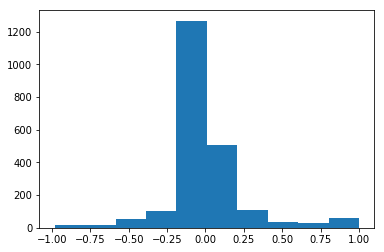

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
df_poor = pd.read_table('Simulations/Data/custom_dataset_poor_little.txt', sep='\t')
plt.hist(df_poor.corr().values.ravel())

(array([ 498.,  250.,  130.,  100.,  148.,  124.,   76.,   88.,  252.,  543.]),
 array([ -9.98816871e-01,  -7.98935184e-01,  -5.99053497e-01,
         -3.99171810e-01,  -1.99290123e-01,   5.91564378e-04,
          2.00473252e-01,   4.00354939e-01,   6.00236626e-01,
          8.00118313e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

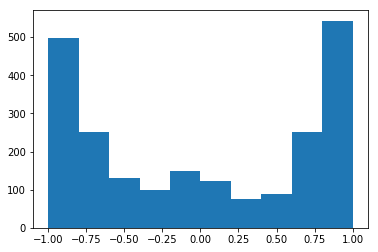

In [39]:
df_rich = pd.read_table('Simulations/Data/custom_dataset_rich_little.txt', sep = '\t')
plt.hist(df_rich.corr().values.ravel())

The table below shows the evaluation metrics for the complete datasets. 

In [40]:
# table with output?

From the values, it becomes clear that the simulated datasets are quite perfect datasets. All four datasets have an explained variance perfecentage of 99.99%. The MSE is 0.01 for the datasets with little noise and 24.6 for the data with much noise. The MAE increases from 0.08 to 4.0. 

The perfect characteristics of these datasets make that some missing data methods give exactly similar results. For instance, `mean` and `median` imputation give the same results, and `regression` and `stochastic` imputation as well.

In [41]:
# data poor correlation and much noise

What we can understand from the simulated datasets, is that the performance of `regression` imputation is clearly affected by the correlation structure of the data. Earlier, we saw that `regression` imputation performs comparable with `mean` and `median` imputation when the correlation structure is poor. For the simulated datasets with the poor correlation structure, `regression` imputation gives even lower MSE, RMSE and MAE values than `mean` and `median` imputation. It seems that `regression` imputation is a useful method when the correlation structure of the data is poor. 

## Conclusion

The effect of missing values treatment on the outcome of a data science regression model depends on the characteristics of the data. Yet, this effect may be smaller than we think. Some general conclusions:

1. For relatively low missingness percentages, there is almost no difference between the missing data methodologies. The differences occur for higher missingness percentages. 
2. When the missingness in the trainingset is similar to the missingness in the testset (as is the case in our simulations), the type of missingness mechanism is not on influence on the performance of the model or the choice of missing data method.
3. The performance of `regression` imputation is sensitive for the correlation structure in the data. With small correlations, the evaluations metrics after using `regression` imputation are smaller than when using `mean` or `median` imputation.
4. `mean` and `median` imputation seem to give the most stable results, independent of specific data characteristics. 

## Contact information

Rianne Schouten, Missing Data Specialist, rianne.schouten@dpa.nl

Coen Seinen, Data Scientist, coen.seinen@bigdatarepublic.nl